# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 64]):
    """
    Build your own model
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = [1e-1,1e-2,1e-3,1e-4,1e-5,3e-1,3e-2,3e-3]
EPOCHS = 100
BATCH_SIZE = 256
MOMENTUM = 0.95

In [7]:
#SGD
results = {}
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

W0721 20:12:23.511382 4617700800 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0721 20:12:23.512778 4617700800 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0721 20:12:23.531334 4617700800 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0721 20:12:23.532500 4617700800 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0721 20:12:23.536632 46

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
output (Dense)               (None, 10)                650       
Total params: 1,746,506
Trainable params: 1,746,506
Non-trainable params: 0
____________________________________

Epoch 51/100
50000/50000 [==============================] - 5s 103us/step - loss: 1.4441 - acc: 0.4942 - val_loss: 1.6416 - val_acc: 0.4367
Epoch 52/100
50000/50000 [==============================] - 5s 102us/step - loss: 1.4740 - acc: 0.4895 - val_loss: 1.6278 - val_acc: 0.4494
Epoch 53/100
50000/50000 [==============================] - 6s 113us/step - loss: 1.4390 - acc: 0.4983 - val_loss: 1.6068 - val_acc: 0.4555
Epoch 54/100
50000/50000 [==============================] - 5s 103us/step - loss: 1.4349 - acc: 0.5012 - val_loss: 1.6244 - val_acc: 0.4481
Epoch 55/100
50000/50000 [==============================] - 5s 109us/step - loss: 1.4316 - acc: 0.5019 - val_loss: 1.6169 - val_acc: 0.4476
Epoch 56/100
50000/50000 [==============================] - 5s 110us/step - loss: 1.4339 - acc: 0.5044 - val_loss: 1.7360 - val_acc: 0.4291
Epoch 57/100
50000/50000 [==============================] - 5s 105us/step - loss: 1.4417 - acc: 0.4985 - val_loss: 1.6391 - val_acc: 0.4372
Epoch 58/100
50000/5

50000/50000 [==============================] - 5s 110us/step - loss: 1.8598 - acc: 0.3306 - val_loss: 1.7981 - val_acc: 0.3494
Epoch 2/100
50000/50000 [==============================] - 5s 108us/step - loss: 1.6249 - acc: 0.4216 - val_loss: 1.6648 - val_acc: 0.3978
Epoch 3/100
50000/50000 [==============================] - 5s 108us/step - loss: 1.5277 - acc: 0.4570 - val_loss: 1.5245 - val_acc: 0.4460
Epoch 4/100
50000/50000 [==============================] - 5s 108us/step - loss: 1.4592 - acc: 0.4796 - val_loss: 1.6929 - val_acc: 0.4119
Epoch 5/100
50000/50000 [==============================] - 6s 111us/step - loss: 1.4211 - acc: 0.4922 - val_loss: 1.4611 - val_acc: 0.4823
Epoch 6/100
50000/50000 [==============================] - 5s 109us/step - loss: 1.3781 - acc: 0.5093 - val_loss: 1.4562 - val_acc: 0.4844
Epoch 7/100
50000/50000 [==============================] - 5s 108us/step - loss: 1.3420 - acc: 0.5221 - val_loss: 1.5152 - val_acc: 0.4729
Epoch 8/100
50000/50000 [==============

50000/50000 [==============================] - 6s 115us/step - loss: 1.4781 - acc: 0.4783 - val_loss: 1.5284 - val_acc: 0.4580
Epoch 10/100
50000/50000 [==============================] - 6s 117us/step - loss: 1.4499 - acc: 0.4865 - val_loss: 1.4821 - val_acc: 0.4678
Epoch 11/100
50000/50000 [==============================] - 6s 113us/step - loss: 1.4225 - acc: 0.4967 - val_loss: 1.4615 - val_acc: 0.4790
Epoch 12/100
50000/50000 [==============================] - 6s 116us/step - loss: 1.3994 - acc: 0.5034 - val_loss: 1.4685 - val_acc: 0.4697
Epoch 13/100
50000/50000 [==============================] - 6s 115us/step - loss: 1.3733 - acc: 0.5140 - val_loss: 1.4369 - val_acc: 0.4863
Epoch 14/100
50000/50000 [==============================] - 6s 114us/step - loss: 1.3551 - acc: 0.5189 - val_loss: 1.4217 - val_acc: 0.4917
Epoch 15/100
50000/50000 [==============================] - 6s 117us/step - loss: 1.3330 - acc: 0.5267 - val_loss: 1.5271 - val_acc: 0.4608
Epoch 16/100
50000/50000 [=======

50000/50000 [==============================] - 6s 123us/step - loss: 1.7640 - acc: 0.3812 - val_loss: 1.7595 - val_acc: 0.3798
Epoch 18/100
50000/50000 [==============================] - 6s 120us/step - loss: 1.7525 - acc: 0.3822 - val_loss: 1.7494 - val_acc: 0.3802
Epoch 19/100
50000/50000 [==============================] - 6s 119us/step - loss: 1.7425 - acc: 0.3865 - val_loss: 1.7375 - val_acc: 0.3904
Epoch 20/100
50000/50000 [==============================] - 6s 119us/step - loss: 1.7315 - acc: 0.3901 - val_loss: 1.7278 - val_acc: 0.3924
Epoch 21/100
50000/50000 [==============================] - 6s 121us/step - loss: 1.7220 - acc: 0.3940 - val_loss: 1.7175 - val_acc: 0.3953
Epoch 22/100
50000/50000 [==============================] - 6s 123us/step - loss: 1.7121 - acc: 0.3969 - val_loss: 1.7090 - val_acc: 0.3978
Epoch 23/100
50000/50000 [==============================] - 6s 120us/step - loss: 1.7029 - acc: 0.4024 - val_loss: 1.7017 - val_acc: 0.3990
Epoch 24/100
50000/50000 [=======

Epoch 25/100
50000/50000 [==============================] - 6s 121us/step - loss: 2.0670 - acc: 0.2522 - val_loss: 2.0647 - val_acc: 0.2568
Epoch 26/100
50000/50000 [==============================] - 8s 163us/step - loss: 2.0611 - acc: 0.2539 - val_loss: 2.0590 - val_acc: 0.2592
Epoch 27/100
50000/50000 [==============================] - 8s 150us/step - loss: 2.0555 - acc: 0.2568 - val_loss: 2.0535 - val_acc: 0.2614
Epoch 28/100
50000/50000 [==============================] - 7s 134us/step - loss: 2.0501 - acc: 0.2595 - val_loss: 2.0481 - val_acc: 0.2636
Epoch 29/100
50000/50000 [==============================] - 6s 122us/step - loss: 2.0448 - acc: 0.2606 - val_loss: 2.0430 - val_acc: 0.2679
Epoch 30/100
50000/50000 [==============================] - 7s 145us/step - loss: 2.0397 - acc: 0.2653 - val_loss: 2.0382 - val_acc: 0.2706
Epoch 31/100
50000/50000 [==============================] - 8s 153us/step - loss: 2.0349 - acc: 0.2670 - val_loss: 2.0333 - val_acc: 0.2724
Epoch 32/100
50000/5

50000/50000 [==============================] - 6s 112us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 33/100
50000/50000 [==============================] - 6s 114us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 34/100
50000/50000 [==============================] - 6s 110us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 35/100
50000/50000 [==============================] - 6s 112us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 36/100
50000/50000 [==============================] - 6s 113us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 37/100
50000/50000 [==============================] - 6s 111us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 38/100
50000/50000 [==============================] - 6s 114us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 39/100
50000/

Epoch 90/100
50000/50000 [==============================] - 6s 111us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 91/100
50000/50000 [==============================] - 6s 111us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 92/100
50000/50000 [==============================] - 5s 109us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 93/100
50000/50000 [==============================] - 6s 111us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 94/100
50000/50000 [==============================] - 6s 111us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 95/100
50000/50000 [==============================] - 6s 111us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 96/100
50000/50000 [==============================] - 6s 112us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 

Epoch 40/100
50000/50000 [==============================] - 5s 107us/step - loss: 0.7818 - acc: 0.7204 - val_loss: 1.6622 - val_acc: 0.5096
Epoch 41/100
50000/50000 [==============================] - 5s 110us/step - loss: 0.7709 - acc: 0.7236 - val_loss: 1.7258 - val_acc: 0.5045
Epoch 42/100
50000/50000 [==============================] - 6s 121us/step - loss: 0.7472 - acc: 0.7301 - val_loss: 1.7114 - val_acc: 0.5156
Epoch 43/100
50000/50000 [==============================] - 5s 109us/step - loss: 0.7423 - acc: 0.7318 - val_loss: 1.7329 - val_acc: 0.5103
Epoch 44/100
50000/50000 [==============================] - 5s 103us/step - loss: 0.7350 - acc: 0.7345 - val_loss: 1.7814 - val_acc: 0.4923
Epoch 45/100
50000/50000 [==============================] - 5s 98us/step - loss: 0.7163 - acc: 0.7417 - val_loss: 1.8887 - val_acc: 0.4968
Epoch 46/100
50000/50000 [==============================] - 5s 107us/step - loss: 0.7117 - acc: 0.7405 - val_loss: 1.8454 - val_acc: 0.5033
Epoch 47/100
50000/50

Epoch 99/100
50000/50000 [==============================] - 6s 117us/step - loss: 0.4963 - acc: 0.8287 - val_loss: 2.6832 - val_acc: 0.4914
Epoch 100/100
50000/50000 [==============================] - 6s 110us/step - loss: 0.4872 - acc: 0.8328 - val_loss: 2.6832 - val_acc: 0.4908
Experiment with LR = 0.003000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        

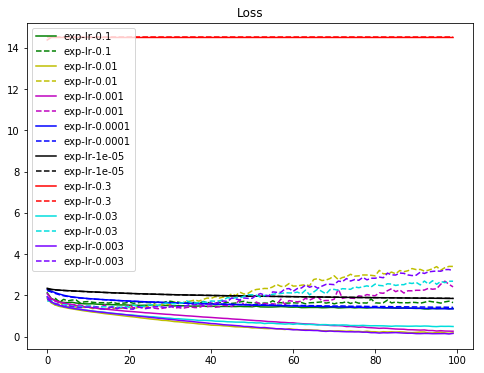

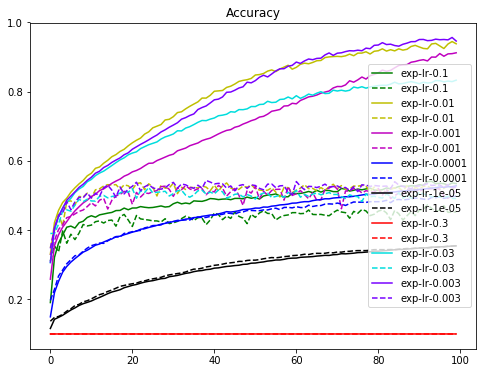

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
color_bar = ["g","y","m","b","k","r","#00DDDD","#7700FF"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])), results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [9]:
#RMSprop
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.rmsprop(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
output (Dense)               (None, 10)                650       
Total params: 1,746,506
Trainable params: 1,746,506
Non-trainable params: 0
____________________________________

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 7s 134us/step - loss: 14.4432 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/100
50000/50000 [==============================] - 6s 121us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/100
50000/50000 [==============================] - 6s 117us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/100
50000/50000 [==============================] - 6s 117us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/100
50000/50000 [==============================] - 7s 132us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/100
50000/50000 [==============================] - 6s 120us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/100
50000/50000 [==============================] - 6s 128us/step - loss: 14.5063 - acc: 0.1000 -

50000/50000 [==============================] - 6s 117us/step - loss: 1.5856 - acc: 0.4343 - val_loss: 1.7584 - val_acc: 0.3806
Epoch 8/100
50000/50000 [==============================] - 7s 134us/step - loss: 1.5516 - acc: 0.4419 - val_loss: 1.7419 - val_acc: 0.3944
Epoch 9/100
50000/50000 [==============================] - 6s 126us/step - loss: 1.5214 - acc: 0.4565 - val_loss: 1.5660 - val_acc: 0.4403
Epoch 10/100
50000/50000 [==============================] - 7s 135us/step - loss: 1.4916 - acc: 0.4655 - val_loss: 1.5201 - val_acc: 0.4585
Epoch 11/100
50000/50000 [==============================] - 6s 115us/step - loss: 1.4651 - acc: 0.4776 - val_loss: 1.5106 - val_acc: 0.4721
Epoch 12/100
50000/50000 [==============================] - 6s 117us/step - loss: 1.4397 - acc: 0.4869 - val_loss: 1.7204 - val_acc: 0.4035
Epoch 13/100
50000/50000 [==============================] - 6s 116us/step - loss: 1.4168 - acc: 0.4934 - val_loss: 1.5691 - val_acc: 0.4603
Epoch 14/100
50000/50000 [=========

50000/50000 [==============================] - 6s 127us/step - loss: 1.3826 - acc: 0.5133 - val_loss: 1.5149 - val_acc: 0.4565
Epoch 16/100
50000/50000 [==============================] - 6s 126us/step - loss: 1.3699 - acc: 0.5200 - val_loss: 1.5039 - val_acc: 0.4621
Epoch 17/100
50000/50000 [==============================] - 6s 126us/step - loss: 1.3503 - acc: 0.5247 - val_loss: 1.4795 - val_acc: 0.4761
Epoch 18/100
50000/50000 [==============================] - 6s 127us/step - loss: 1.3314 - acc: 0.5311 - val_loss: 1.5169 - val_acc: 0.4595
Epoch 19/100
50000/50000 [==============================] - 6s 125us/step - loss: 1.3183 - acc: 0.5339 - val_loss: 1.4145 - val_acc: 0.5053
Epoch 20/100
50000/50000 [==============================] - 6s 125us/step - loss: 1.3004 - acc: 0.5425 - val_loss: 1.4734 - val_acc: 0.4742
Epoch 21/100
50000/50000 [==============================] - 6s 127us/step - loss: 1.2890 - acc: 0.5452 - val_loss: 1.4110 - val_acc: 0.4981
Epoch 22/100
50000/50000 [=======

Epoch 23/100
50000/50000 [==============================] - 5s 102us/step - loss: 1.5598 - acc: 0.4582 - val_loss: 1.5793 - val_acc: 0.4455
Epoch 24/100
50000/50000 [==============================] - 5s 103us/step - loss: 1.5515 - acc: 0.4598 - val_loss: 1.5763 - val_acc: 0.4436
Epoch 25/100
50000/50000 [==============================] - 5s 103us/step - loss: 1.5452 - acc: 0.4610 - val_loss: 1.5715 - val_acc: 0.4466
Epoch 26/100
50000/50000 [==============================] - 5s 103us/step - loss: 1.5373 - acc: 0.4643 - val_loss: 1.5576 - val_acc: 0.4510
Epoch 27/100
50000/50000 [==============================] - 5s 103us/step - loss: 1.5303 - acc: 0.4674 - val_loss: 1.5606 - val_acc: 0.4434
Epoch 28/100
50000/50000 [==============================] - 5s 104us/step - loss: 1.5238 - acc: 0.4707 - val_loss: 1.5726 - val_acc: 0.4441
Epoch 29/100
50000/50000 [==============================] - 5s 104us/step - loss: 1.5174 - acc: 0.4708 - val_loss: 1.5481 - val_acc: 0.4595
Epoch 30/100
50000/5

50000/50000 [==============================] - 5s 107us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 31/100
50000/50000 [==============================] - 5s 108us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 32/100
50000/50000 [==============================] - 5s 107us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 33/100
50000/50000 [==============================] - 5s 110us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 34/100
50000/50000 [==============================] - 5s 107us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 35/100
50000/50000 [==============================] - 5s 108us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 36/100
50000/50000 [==============================] - 5s 107us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 37/100
50000/

Epoch 88/100
50000/50000 [==============================] - 6s 112us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 89/100
50000/50000 [==============================] - 6s 112us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 90/100
50000/50000 [==============================] - 6s 112us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 91/100
50000/50000 [==============================] - 6s 112us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 92/100
50000/50000 [==============================] - 6s 117us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 93/100
50000/50000 [==============================] - 6s 116us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 94/100
50000/50000 [==============================] - 6s 114us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 

Epoch 95/100
50000/50000 [==============================] - 6s 128us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 96/100
50000/50000 [==============================] - 6s 128us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 97/100
50000/50000 [==============================] - 6s 128us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 98/100
50000/50000 [==============================] - 6s 128us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 99/100
50000/50000 [==============================] - 6s 130us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 100/100
50000/50000 [==============================] - 6s 129us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Experiment with LR = 0.003000
_________________________________________________________________
Layer (type)                 Output Shape          

Epoch 45/100
50000/50000 [==============================] - 7s 132us/step - loss: 1.3799 - acc: 0.5129 - val_loss: 1.6337 - val_acc: 0.4433
Epoch 46/100
50000/50000 [==============================] - 7s 132us/step - loss: 1.3664 - acc: 0.5160 - val_loss: 1.8244 - val_acc: 0.3789
Epoch 47/100
50000/50000 [==============================] - 7s 135us/step - loss: 1.3660 - acc: 0.5164 - val_loss: 1.9283 - val_acc: 0.4199
Epoch 48/100
50000/50000 [==============================] - 7s 136us/step - loss: 1.3677 - acc: 0.5149 - val_loss: 1.7789 - val_acc: 0.4121
Epoch 49/100
50000/50000 [==============================] - 7s 136us/step - loss: 1.3737 - acc: 0.5164 - val_loss: 1.6443 - val_acc: 0.4518
Epoch 50/100
50000/50000 [==============================] - 7s 136us/step - loss: 1.3600 - acc: 0.5190 - val_loss: 1.6372 - val_acc: 0.4384
Epoch 51/100
50000/50000 [==============================] - 7s 138us/step - loss: 1.3668 - acc: 0.5153 - val_loss: 1.6194 - val_acc: 0.4547
Epoch 52/100
50000/5

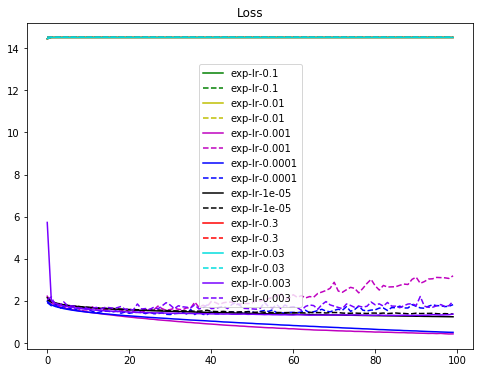

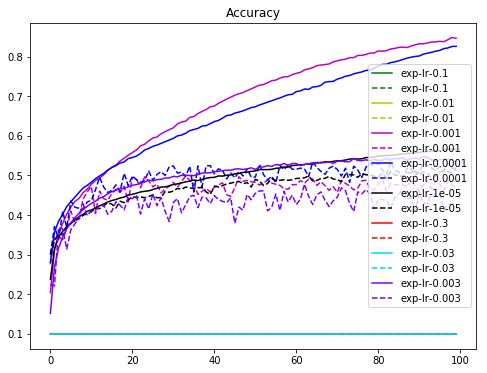

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
color_bar = ["g","y","m","b","k","r","#00DDDD","#7700FF"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])), results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [11]:
# Adagrad
results = {}
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = optimizer=keras.optimizers.Adagrad(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
output (Dense)               (None, 10)                650       
Total params: 1,746,506
Trainable params: 1,746,506
Non-trainable params: 0
____________________________________

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 5s 100us/step - loss: 14.4263 - acc: 0.1003 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/100
50000/50000 [==============================] - 5s 96us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/100
50000/50000 [==============================] - 5s 98us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/100
50000/50000 [==============================] - 5s 99us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/100
50000/50000 [==============================] - 5s 97us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/100
50000/50000 [==============================] - 5s 97us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/100
50000/50000 [==============================] - 5s 98us/step - loss: 14.5063 - acc: 0.1000 - val_l

50000/50000 [==============================] - 5s 105us/step - loss: 1.5955 - acc: 0.4386 - val_loss: 1.6618 - val_acc: 0.4062
Epoch 8/100
50000/50000 [==============================] - 5s 107us/step - loss: 1.5743 - acc: 0.4473 - val_loss: 1.6074 - val_acc: 0.4251
Epoch 9/100
50000/50000 [==============================] - 5s 108us/step - loss: 1.5569 - acc: 0.4538 - val_loss: 1.5714 - val_acc: 0.4466
Epoch 10/100
50000/50000 [==============================] - 5s 106us/step - loss: 1.5382 - acc: 0.4613 - val_loss: 1.5582 - val_acc: 0.4467
Epoch 11/100
50000/50000 [==============================] - 5s 108us/step - loss: 1.5253 - acc: 0.4649 - val_loss: 1.5412 - val_acc: 0.4521
Epoch 12/100
50000/50000 [==============================] - 5s 107us/step - loss: 1.5098 - acc: 0.4707 - val_loss: 1.5559 - val_acc: 0.4473
Epoch 13/100
50000/50000 [==============================] - 5s 107us/step - loss: 1.4975 - acc: 0.4742 - val_loss: 1.5286 - val_acc: 0.4589
Epoch 14/100
50000/50000 [=========

50000/50000 [==============================] - 5s 110us/step - loss: 1.7726 - acc: 0.3846 - val_loss: 1.7729 - val_acc: 0.3802
Epoch 16/100
50000/50000 [==============================] - 6s 111us/step - loss: 1.7667 - acc: 0.3862 - val_loss: 1.7672 - val_acc: 0.3848
Epoch 17/100
50000/50000 [==============================] - 6s 111us/step - loss: 1.7615 - acc: 0.3880 - val_loss: 1.7624 - val_acc: 0.3837
Epoch 18/100
50000/50000 [==============================] - 5s 110us/step - loss: 1.7564 - acc: 0.3900 - val_loss: 1.7569 - val_acc: 0.3864
Epoch 19/100
50000/50000 [==============================] - 6s 112us/step - loss: 1.7516 - acc: 0.3919 - val_loss: 1.7528 - val_acc: 0.3879
Epoch 20/100
50000/50000 [==============================] - 6s 111us/step - loss: 1.7471 - acc: 0.3935 - val_loss: 1.7499 - val_acc: 0.3900
Epoch 21/100
50000/50000 [==============================] - 6s 111us/step - loss: 1.7427 - acc: 0.3943 - val_loss: 1.7438 - val_acc: 0.3910
Epoch 22/100
50000/50000 [=======

50000/50000 [==============================] - 7s 143us/step - loss: 2.1033 - acc: 0.2685 - val_loss: 2.1030 - val_acc: 0.2702
Epoch 24/100
50000/50000 [==============================] - 7s 147us/step - loss: 2.1003 - acc: 0.2687 - val_loss: 2.1000 - val_acc: 0.2721
Epoch 25/100
50000/50000 [==============================] - 8s 160us/step - loss: 2.0973 - acc: 0.2692 - val_loss: 2.0972 - val_acc: 0.2721
Epoch 26/100
50000/50000 [==============================] - 9s 189us/step - loss: 2.0945 - acc: 0.2704 - val_loss: 2.0944 - val_acc: 0.2723
Epoch 27/100
50000/50000 [==============================] - 9s 173us/step - loss: 2.0917 - acc: 0.2708 - val_loss: 2.0916 - val_acc: 0.2723
Epoch 28/100
50000/50000 [==============================] - 7s 137us/step - loss: 2.0889 - acc: 0.2717 - val_loss: 2.0890 - val_acc: 0.2728
Epoch 29/100
50000/50000 [==============================] - 8s 157us/step - loss: 2.0862 - acc: 0.2725 - val_loss: 2.0863 - val_acc: 0.2732
Epoch 30/100
50000/50000 [=======

50000/50000 [==============================] - 8s 155us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 31/100
50000/50000 [==============================] - 8s 156us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 32/100
50000/50000 [==============================] - 8s 159us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 33/100
50000/50000 [==============================] - 8s 154us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 34/100
50000/50000 [==============================] - 8s 160us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 35/100
50000/50000 [==============================] - 8s 154us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 36/100
50000/50000 [==============================] - 8s 155us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 37/100
50000/

Epoch 88/100
50000/50000 [==============================] - 7s 139us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 89/100
50000/50000 [==============================] - 7s 138us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 90/100
50000/50000 [==============================] - 7s 138us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 91/100
50000/50000 [==============================] - 7s 141us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 92/100
50000/50000 [==============================] - 7s 139us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 93/100
50000/50000 [==============================] - 7s 141us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 94/100
50000/50000 [==============================] - 7s 137us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 

Epoch 95/100
50000/50000 [==============================] - 8s 158us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 96/100
50000/50000 [==============================] - 9s 185us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 97/100
50000/50000 [==============================] - 8s 168us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 98/100
50000/50000 [==============================] - 9s 177us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 99/100
50000/50000 [==============================] - 9s 188us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 100/100
50000/50000 [==============================] - 7s 144us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Experiment with LR = 0.003000
_________________________________________________________________
Layer (type)                 Output Shape          

Epoch 45/100
50000/50000 [==============================] - 7s 132us/step - loss: 1.2450 - acc: 0.5642 - val_loss: 1.3612 - val_acc: 0.5216
Epoch 46/100
50000/50000 [==============================] - 7s 135us/step - loss: 1.2404 - acc: 0.5661 - val_loss: 1.4493 - val_acc: 0.4878
Epoch 47/100
50000/50000 [==============================] - 7s 132us/step - loss: 1.2353 - acc: 0.5673 - val_loss: 1.3741 - val_acc: 0.5184
Epoch 48/100
50000/50000 [==============================] - 7s 132us/step - loss: 1.2323 - acc: 0.5691 - val_loss: 1.3608 - val_acc: 0.5160
Epoch 49/100
50000/50000 [==============================] - 7s 131us/step - loss: 1.2234 - acc: 0.5722 - val_loss: 1.3717 - val_acc: 0.5173
Epoch 50/100
50000/50000 [==============================] - 7s 132us/step - loss: 1.2175 - acc: 0.5754 - val_loss: 1.3628 - val_acc: 0.5153
Epoch 51/100
50000/50000 [==============================] - 7s 132us/step - loss: 1.2141 - acc: 0.5758 - val_loss: 1.4062 - val_acc: 0.5003
Epoch 52/100
50000/5

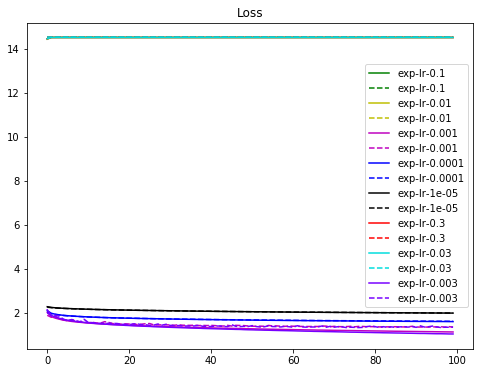

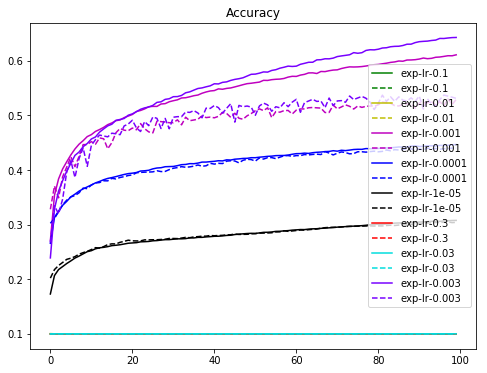

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
color_bar = ["g","y","m","b","k","r","#00DDDD","#7700FF"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])), results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [1]:
# Adam
results = {}
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.Adam(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}



NameError: name 'LEARNING_RATE' is not defined